# Library Import

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.optimizers import Adam

# 케라스에서 할 때 필요한 것
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Train / Test split  &  sclaer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# metrics
from sklearn.metrics import confusion_matrix, r2_score, accuracy_score, f1_score

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# Data

In [156]:
df = pd.read_csv('train.csv')
df

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
1,2,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
2,3,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
3,4,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
4,5,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
147,148,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
148,149,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
149,150,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        151 non-null    int64  
 1   age       151 non-null    int64  
 2   sex       151 non-null    int64  
 3   cp        151 non-null    int64  
 4   trestbps  151 non-null    int64  
 5   chol      151 non-null    int64  
 6   fbs       151 non-null    int64  
 7   restecg   151 non-null    int64  
 8   thalach   151 non-null    int64  
 9   exang     151 non-null    int64  
 10  oldpeak   151 non-null    float64
 11  slope     151 non-null    int64  
 12  ca        151 non-null    int64  
 13  thal      151 non-null    int64  
 14  target    151 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 17.8 KB


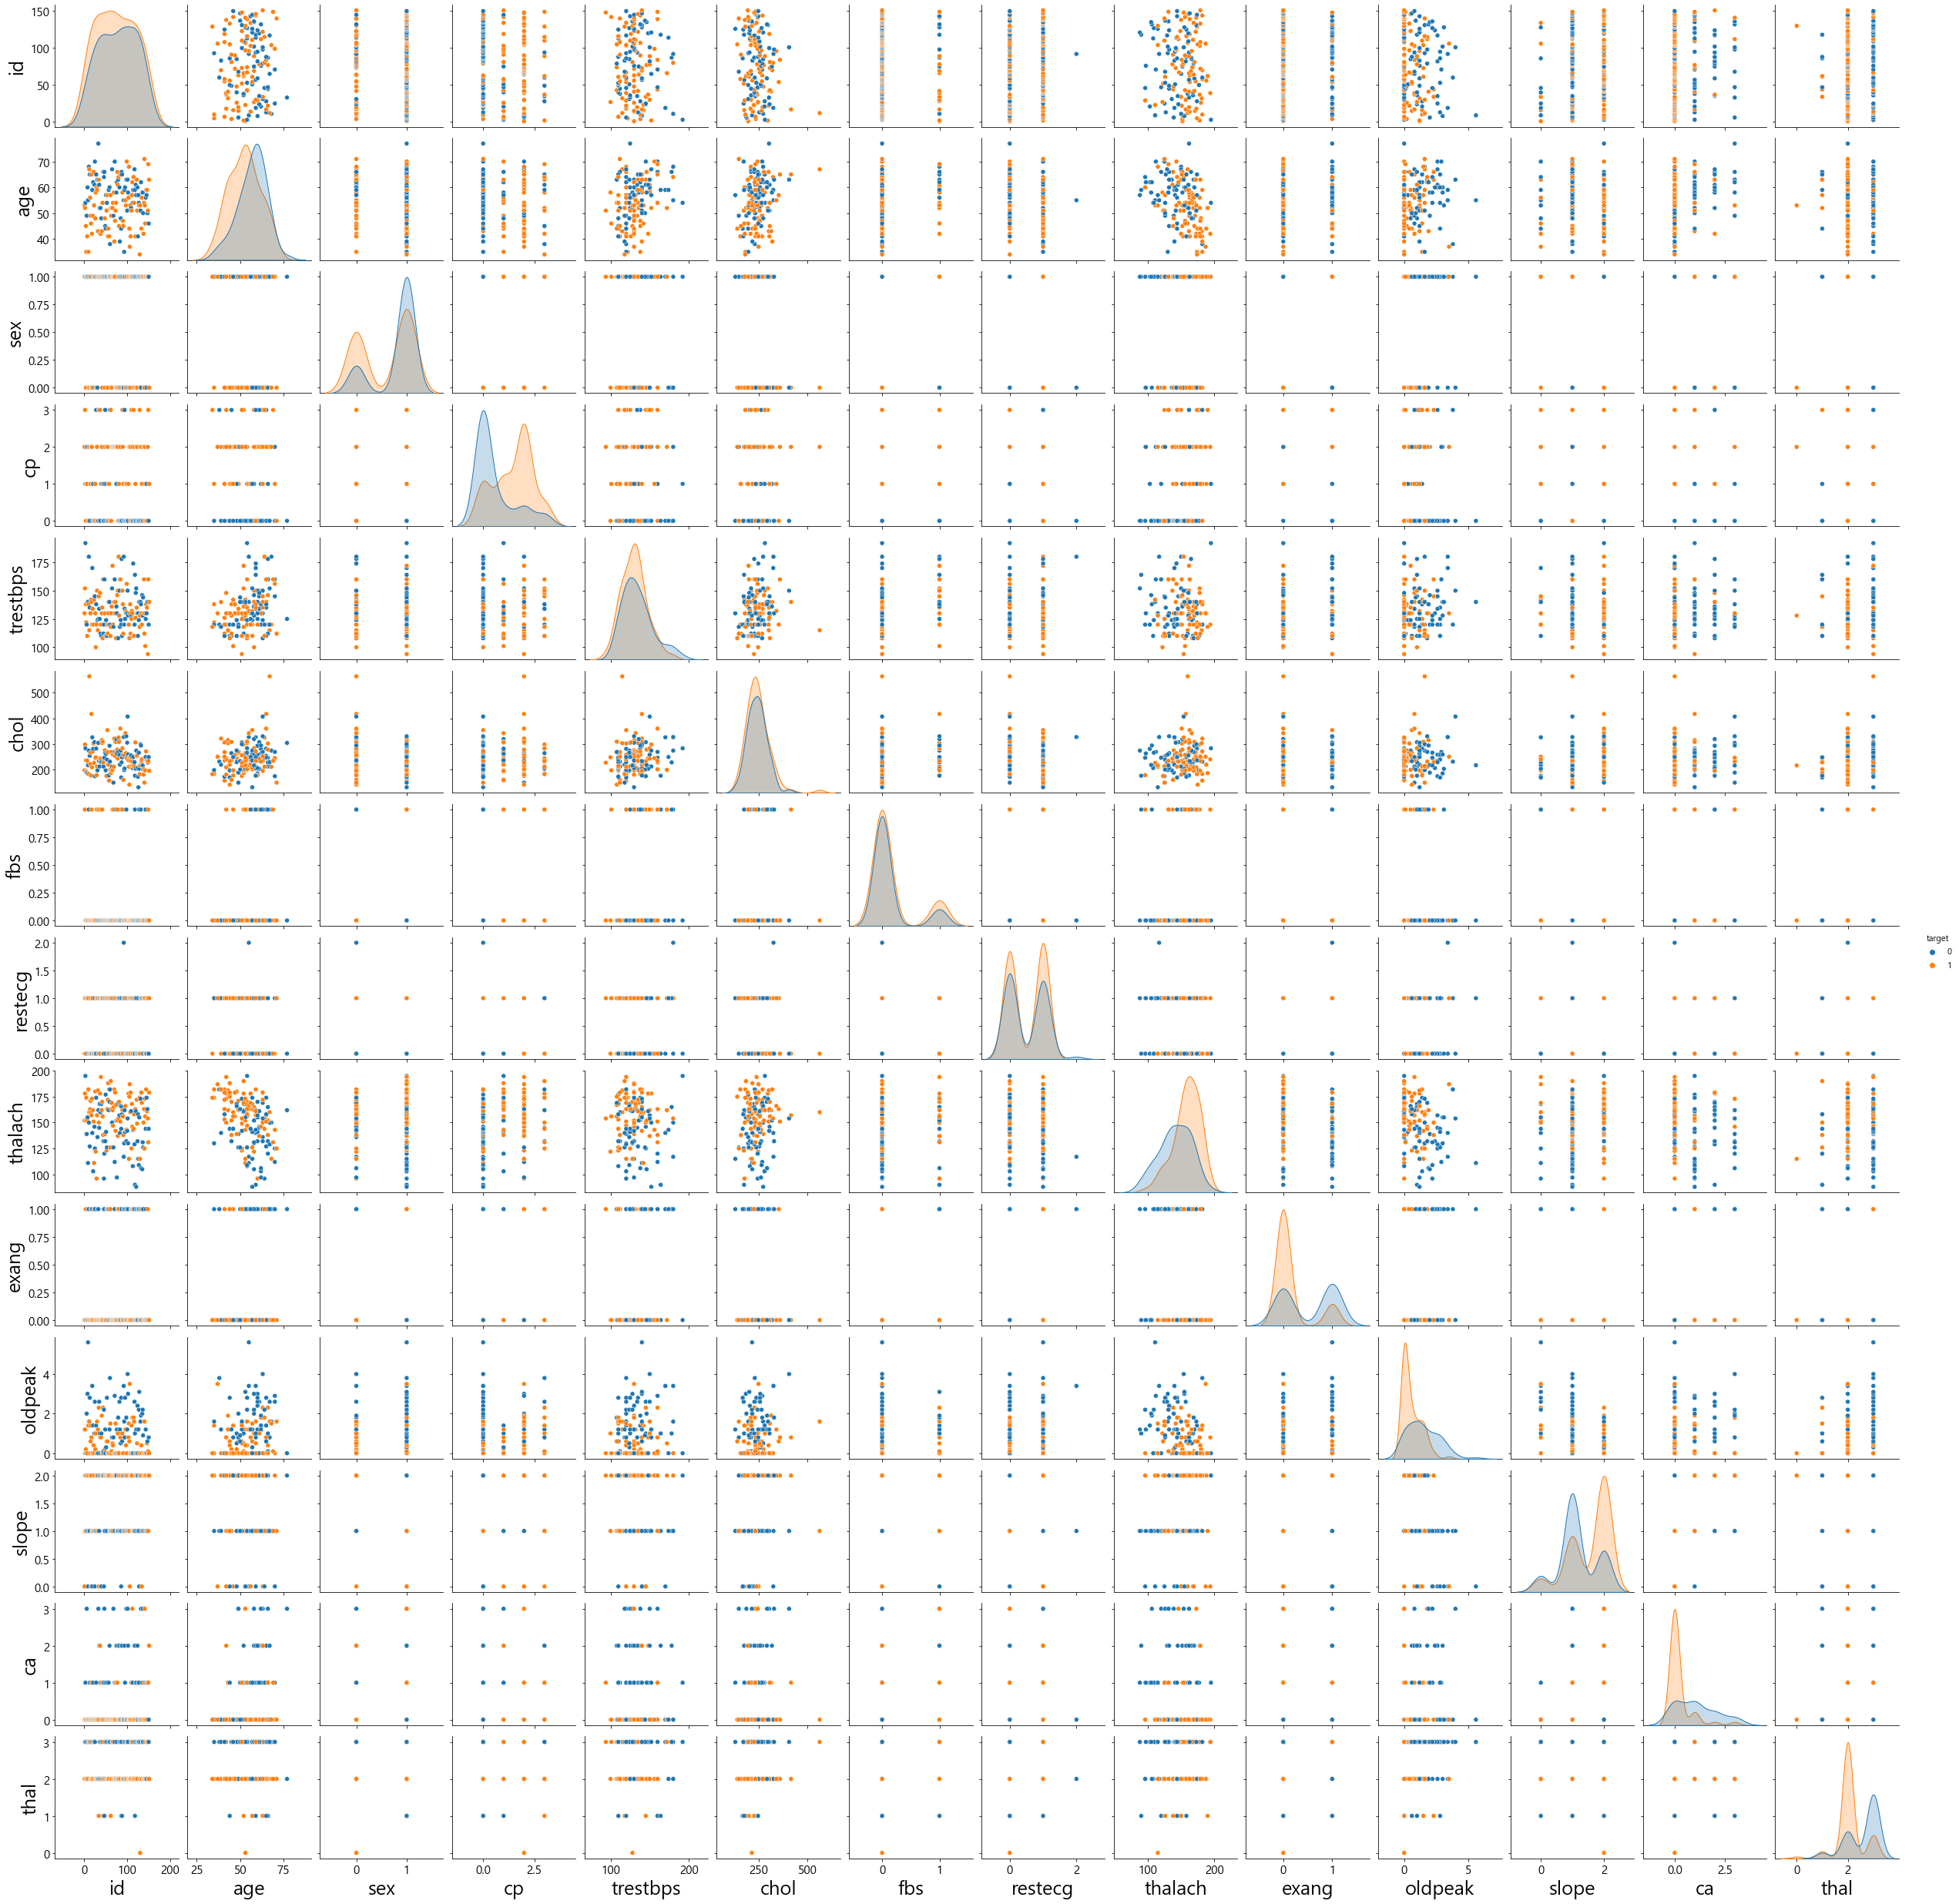

In [158]:
sns.pairplot(df,hue='target')
plt.show()

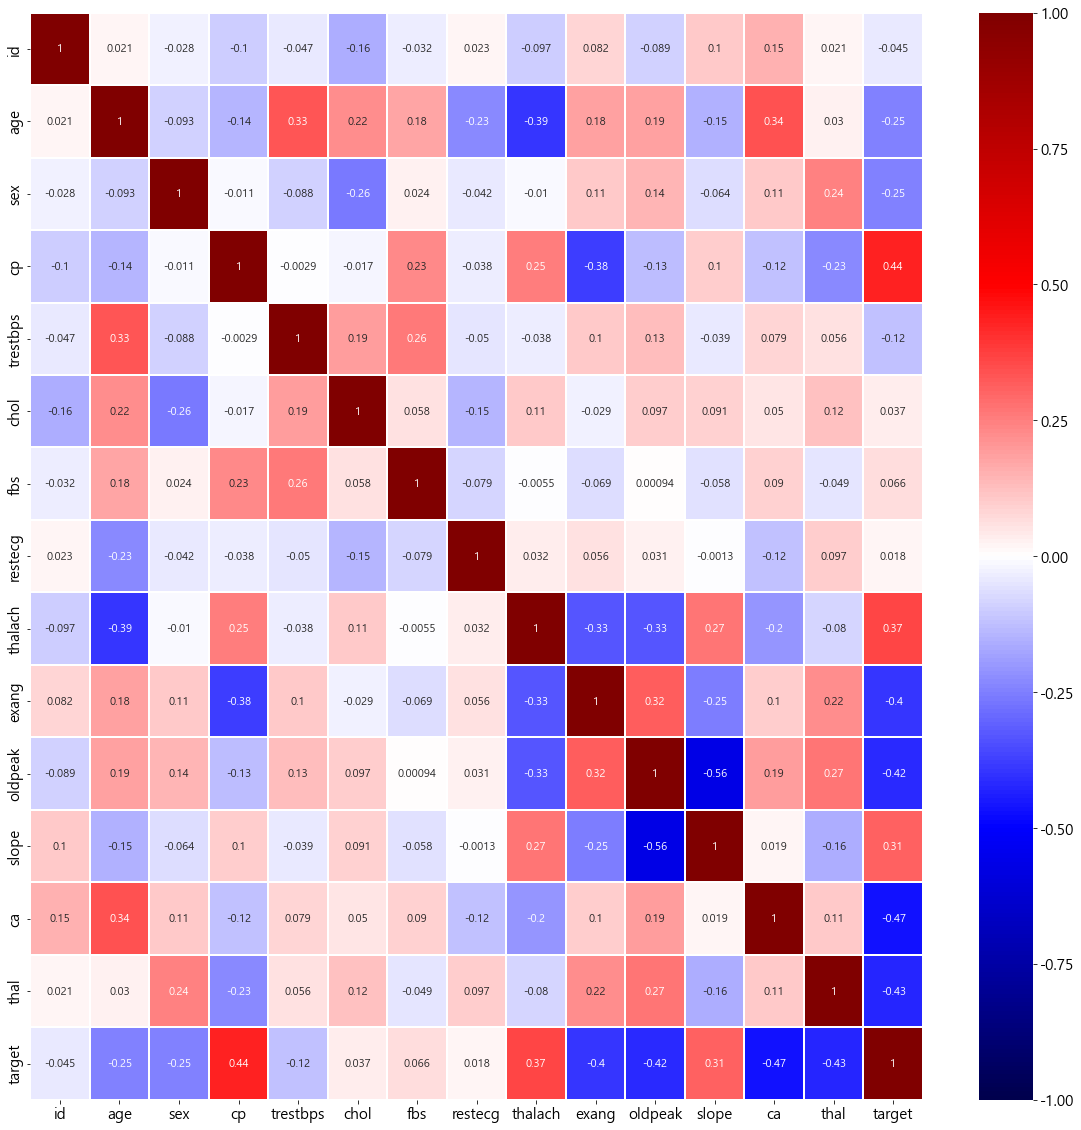

In [159]:
plt.figure( figsize=(20,20))
sns.heatmap(df.corr(), vmin=-1, vmax=1 ,annot=True,
           linewidths=0.2, cmap='seismic')
plt.show()

id	age	sex	cp	trestbps	chol	fbs	restecg	thalach	exang	oldpeak	slope	ca	thal	

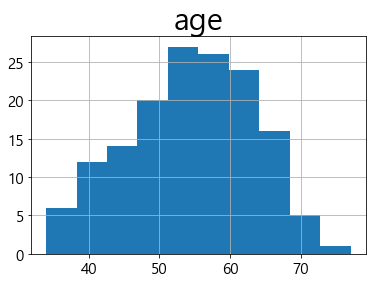

나이평균: 54.496688741721854


In [160]:
df[['age']].hist()
plt.show()
print('나이평균:',df['age'].mean())

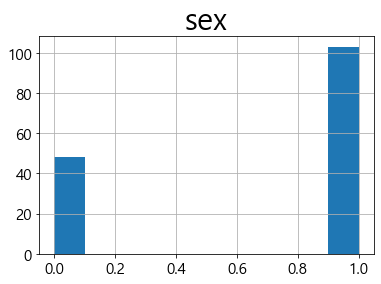

성별분포: 0.6821192052980133
성별은 남자가 두배 더 많다.


In [161]:
df[['sex']].hist()
plt.show()
print('성별분포:',df['sex'].mean())
print('성별은 남자가 두배 더 많다.')

혈압은 맥박에서 수축기의 최고 혈압과 이완기의 최저 혈압의 두 측정치로 요약되는데, 휴식시 정상 혈압은 수축시 100~140mmHg에 이완시 60~90mmHg이고, 혈압이 지속적으로 140/90mmHg 이상일 때 고혈압이 있다고 말한다.

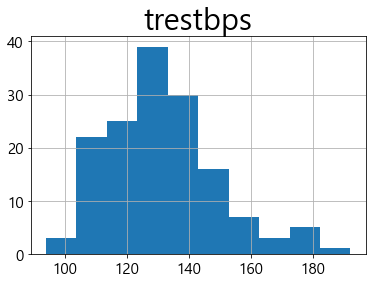

평균혈압: 132.03311258278146
         trestbps
count  151.000000
mean   132.033113
std     17.909929
min     94.000000
25%    120.000000
50%    130.000000
75%    140.000000
max    192.000000


In [162]:
df[['trestbps']].hist()
plt.show()
print('평균혈압:',df['trestbps'].mean())
print(df[['trestbps']].describe())

chol	fbs	restecg	thalach	exang	oldpeak	slope	ca	thal	

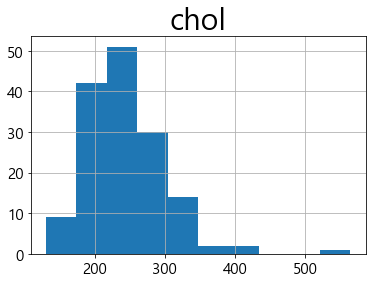

평균콜레스테롤: 244.52980132450332
정상범위 사람 수: 29
경계범위 사람 수: 46
높음범위 사람 수: 75


In [163]:
df[['chol']].hist()
plt.show()
print('평균콜레스테롤:',df['chol'].mean())
print('정상범위 사람 수:',df[df['chol'] < 200].count()[0])
print('경계범위 사람 수:',df[(df['chol'] >200) & (df['chol'] <= 239)].count()[0])
print('높음범위 사람 수:',df[df['chol'] >=240].count()[0])

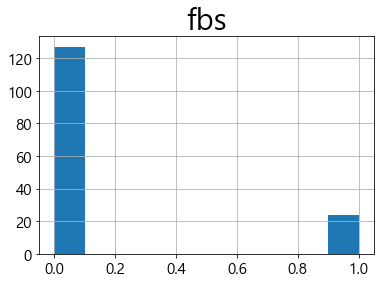

공복 혈당은 120mg/dl 이하인 사람들이 훨씬 많다.


In [164]:
df[['fbs']].hist()
plt.show()
print('공복 혈당은 120mg/dl 이하인 사람들이 훨씬 많다.')

restecg	thalach	exang	oldpeak	slope	ca	thal	

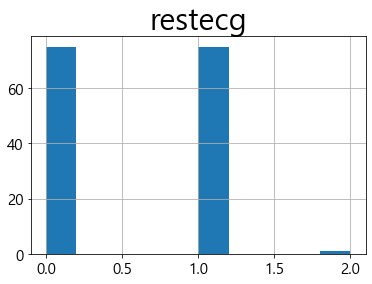

0(좌심실비대), 1(정상)이 거의 1:1 이고, 2(ST-T 파의 이상치)가 극소 존재.


In [165]:
df[['restecg']].hist()
plt.show()
print('0(좌심실비대), 1(정상)이 거의 1:1 이고, 2(ST-T 파의 이상치)가 극소 존재.')

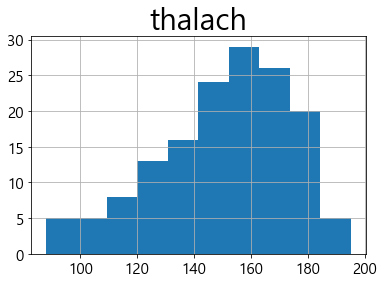

공식에 비해 최대 심박수가 높은 편이다(운동 능력이 뛰어나신 분들?)


In [166]:
df[['thalach']].hist()
plt.show()
print('공식에 비해 최대 심박수가 높은 편이다(운동 능력이 뛰어나신 분들?)')

나이로 계산한 최대 심박수 계산(실스의 공식)


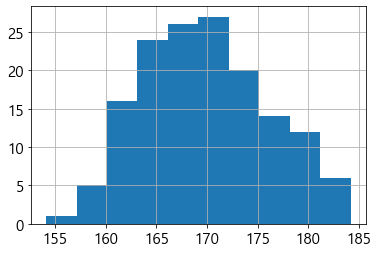

In [167]:
print('나이로 계산한 최대 심박수 계산(실스의 공식)')
df_tmp1 = (208 - (df['age'] * 0.7))
df_tmp1.hist()
plt.show()

나이로 계산한 최대 심박수 계산(헤스켈의 공식)


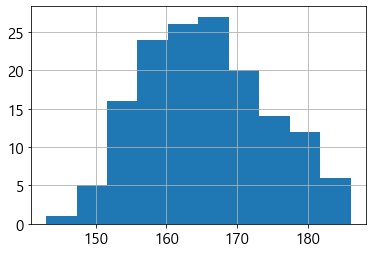

In [168]:
print('나이로 계산한 최대 심박수 계산(헤스켈의 공식)')
df_tmp2 = (220 - df['age'])
df_tmp2.hist()
plt.show()

thalach	exang	oldpeak	slope	ca	thal	

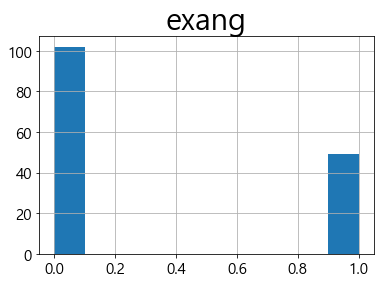

활동으로 인한 협심증 여부 0(없음):이 있음의 2배 정도 된다


In [169]:
df[['exang']].hist()
plt.show()
print('활동으로 인한 협심증 여부 0(없음):이 있음의 2배 정도 된다')

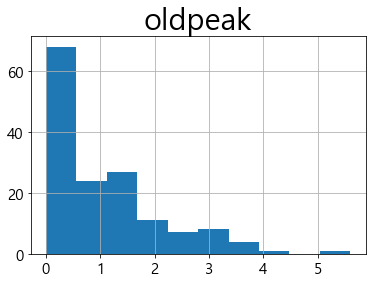

휴식 대비 운동으로 인한 ST 하강


In [170]:
df[['oldpeak']].hist()
plt.show()
print('휴식 대비 운동으로 인한 ST 하강')

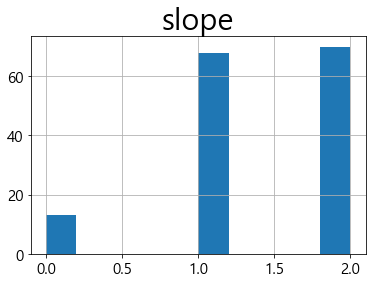

활동 ST 분절 피크의 기울기 0: downsloping 하강 1: flat 평탄 2: upsloping 상승


In [171]:
df[['slope']].hist()
plt.show()
print('활동 ST 분절 피크의 기울기 0: downsloping 하강 1: flat 평탄 2: upsloping 상승')

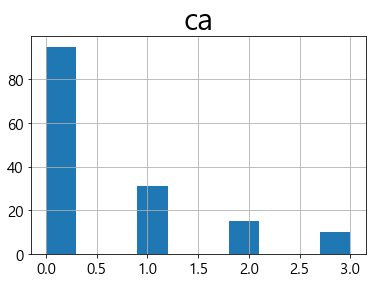

형광 투시로 확인된 주요 혈관 수 (0~3 개)


In [172]:
df[['ca']].hist()
plt.show()
print('형광 투시로 확인된 주요 혈관 수 (0~3 개)')

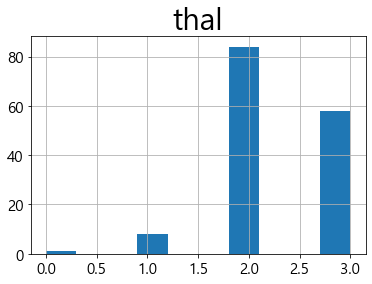

thalassemia 지중해빈혈 여부 0 = Null 1 = normal 정상 2 = fixed defect 고정 결함 3 = reversable defect 가역 결함


In [173]:
df[['thal']].hist()
plt.show()
print('thalassemia 지중해빈혈 여부 0 = Null 1 = normal 정상 2 = fixed defect 고정 결함 3 = reversable defect 가역 결함')

In [174]:
x_data = df.iloc[:, 1:-1]
y_data = df.iloc[:,[-1]]

In [175]:
x_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,53,1,2,130,197,1,0,152,0,1.2,0,0,2
1,52,1,3,152,298,1,1,178,0,1.2,1,0,3
2,54,1,1,192,283,0,0,195,0,0.0,2,1,3
3,45,0,0,138,236,0,0,152,1,0.2,1,0,2
4,35,1,1,122,192,0,1,174,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,50,1,2,140,233,0,1,163,0,0.6,1,1,3
147,51,1,2,94,227,0,1,154,1,0.0,2,1,3
148,69,1,3,160,234,1,0,131,0,0.1,1,1,2
149,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [176]:
y_data

,target
0,1
1,1
2,0
3,1
4,1
...,...
146,0
147,1
148,1
149,0


In [177]:
x_train, x_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.2, stratify=y_data)

## Tensor flow

In [178]:
x = tf.constant(x_train, tf.float32)
y = tf.constant(y_train, tf.float32)
#xavier, he ==> ( 최적의 초기화 알고리즘 )
initX = tf.initializers.GlorotUniform()
w = tf.Variable( initX(shape=[ x_train.shape[1], y_train.shape[1]] ) )    
b = tf.Variable( initX(shape=[ y_train.shape[1]] ) )

def compute_loss():
    z = tf.matmul(x,w) +b
    cost_i = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=z)
    cost = tf.reduce_mean(cost_i)
    return cost

optimizer = Adam( 0.1 )
hist_cost = []

for i in range(1000):
    optimizer.minimize( compute_loss, var_list=[w,b] )
    c = compute_loss().numpy()
    hist_cost.append(c)
    print(i, 'cost:', c)

0 cost: 52.706844
1 cost: 26.594181
2 cost: 3.3010914
3 cost: 23.242632
4 cost: 33.17196
5 cost: 31.941822
6 cost: 23.515467
7 cost: 10.147838
8 cost: 3.260813
9 cost: 11.124312
10 cost: 16.79658
11 cost: 18.254852
12 cost: 16.117678
13 cost: 11.079587
14 cost: 4.72464
15 cost: 3.2558477
16 cost: 8.264259
17 cost: 11.3085165
18 cost: 9.722822
19 cost: 5.2876954
20 cost: 2.9170394
21 cost: 4.365039
22 cost: 6.7697034
23 cost: 7.411089
24 cost: 5.979155
25 cost: 3.7423635
26 cost: 2.8446882
27 cost: 3.897506
28 cost: 5.3212147
29 cost: 5.0495706
30 cost: 3.5361822
31 cost: 2.7392666
32 cost: 3.1650083
33 cost: 3.9836776
34 cost: 4.136225
35 cost: 3.446448
36 cost: 2.7204773
37 cost: 2.6133456
38 cost: 3.0923371
39 cost: 3.3882945
40 cost: 2.9500704
41 cost: 2.4716527
42 cost: 2.4319806
43 cost: 2.7135224
44 cost: 2.8390493
45 cost: 2.6006389
46 cost: 2.2626085
47 cost: 2.2051823
48 cost: 2.3355489
49 cost: 2.4161463
50 cost: 2.214181
51 cost: 2.0216413
52 cost: 1.9843763
53 cost: 2.07265

### Loss 시각화

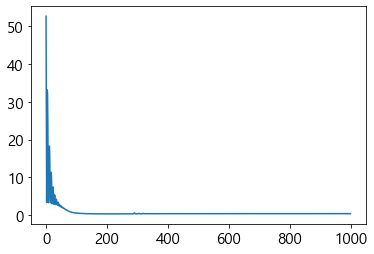

In [179]:
plt.plot(hist_cost)
plt.show()

## Prediction

### Prediction Func.

In [180]:
def hxfn(x_data):
    xd = tf.constant(x_data, tf.float32)
    z = tf.matmul(xd, w) + b
    hx = tf.nn.sigmoid(z)
    return (hx.numpy() > 0.5 )+0

## 정규화 X Tensorflow Train set / confusion matrix, R2, Acc, F1 score

<AxesSubplot:>

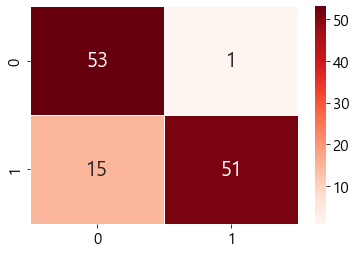

In [181]:
pred = hxfn(x_train)
r = y_train.values
sns.heatmap(confusion_matrix(r, pred),
            annot=True,
            annot_kws={'size': 20},
            cmap='Reds',
            fmt = 'd',
            linewidths=0.5
           )

In [182]:
print('R2 스코어:', r2_score(r, pred))
print('정확도:', accuracy_score(r, pred))
f1 = f1_score(r, pred)
print(f'F1 스코어: {f1:.4f}')

R2 스코어: 0.4612794612794615
정확도: 0.8666666666666667
F1 스코어: 0.8644


## 정규화 X Tensorflow Test set / confusion matrix, R2, Acc, F1 score

<AxesSubplot:>

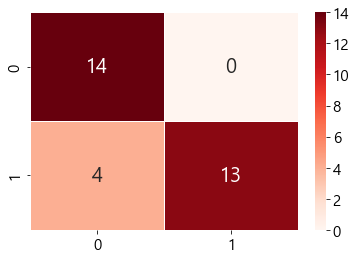

In [183]:
pred = hxfn(x_test)
r = y_test.values
sns.heatmap(confusion_matrix(r, pred),
            annot=True,
            annot_kws={'size': 20},
            cmap='Reds',
            fmt = 'd',
            linewidths=0.5
           )

In [184]:
print('R2 스코어:', r2_score(r, pred))
print('정확도:', accuracy_score(r, pred))
f1 = f1_score(r, pred)
print(f'F1 스코어: {f1:.4f}')

R2 스코어: 0.4789915966386553
정확도: 0.8709677419354839
F1 스코어: 0.8667


# 정규화 X Keras

In [185]:
dense = Dense(units=1, input_dim=x_train.shape[1], activation="sigmoid")    
model = Sequential( [dense] )
model.compile( loss="binary_crossentropy", optimizer=Adam(0.1), metrics=['acc'] ) # loss func. 정의
h = model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 25.9489 - acc: 0.5083
Epoch 2/1000
4/4 [==============================] - 0s 998us/step - loss: 14.6154 - acc: 0.5417
Epoch 3/1000
4/4 [==============================] - 0s 665us/step - loss: 16.7677 - acc: 0.4917
Epoch 4/1000
4/4 [==============================] - 0s 665us/step - loss: 10.1600 - acc: 0.5583
Epoch 5/1000
4/4 [==============================] - 0s 666us/step - loss: 7.8195 - acc: 0.5083
Epoch 6/1000
4/4 [==============================] - 0s 665us/step - loss: 6.5695 - acc: 0.5583
Epoch 7/1000
4/4 [==============================] - 0s 1ms/step - loss: 4.4298 - acc: 0.5833
Epoch 8/1000
4/4 [==============================] - 0s 666us/step - loss: 4.7415 - acc: 0.5333
Epoch 9/1000
4/4 [==============================] - 0s 665us/step - loss: 3.2420 - acc: 0.6167
Epoch 10/1000
4/4 [==============================] - 0s 666us/step - loss: 1.7802 - acc: 0.6750
Epoch 11/1000
4/4 [==============================

### Loss 시각화

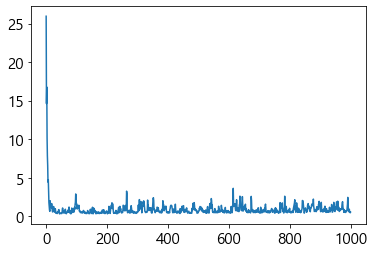

In [186]:
plt.plot(h.history['loss'])
plt.show()

## 정규화 X Keras Train set / confusion matrix, R2, Acc, F1 score

<AxesSubplot:>

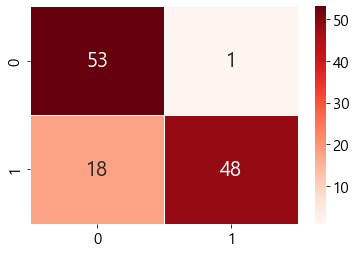

In [187]:
pred = (model.predict(x_train) > 0.5) +0
sns.heatmap(confusion_matrix( y_train, pred),
            annot=True,
            annot_kws={'size': 20},
            cmap='Reds',
            fmt = 'd',
            linewidths=0.5
           )

In [188]:
print('R2 스코어:', r2_score(y_train, pred))
print('정확도:', accuracy_score(y_train, pred))
f1 = f1_score(y_train, pred)
print(f'F1 스코어: {f1:.4f}')

R2 스코어: 0.3602693602693605
정확도: 0.8416666666666667
F1 스코어: 0.8348


## 정규화 X Keras Test set / confusion matrix, R2, Acc, F1 score

<AxesSubplot:>

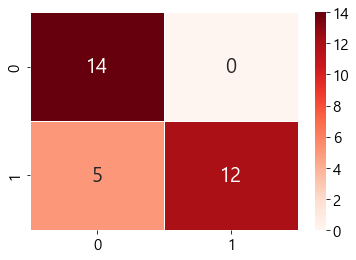

In [189]:
pred = (model.predict(x_test) > 0.5) +0
sns.heatmap(confusion_matrix( y_test, pred),
            annot=True,
            annot_kws={'size': 20},
            cmap='Reds',
            fmt = 'd',
            linewidths=0.5
           )

In [190]:
print('R2 스코어:', r2_score(y_test, pred))
print('정확도:', accuracy_score(y_test, pred))
f1 = f1_score(y_test, pred)
print(f'F1 스코어: {f1:.4f}')

R2 스코어: 0.3487394957983192
정확도: 0.8387096774193549
F1 스코어: 0.8276


# 정규화 한 결과

## 전처리

In [191]:
df_ca = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']]
df_nu = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']]

In [192]:
ca_label = pd.get_dummies(df_ca, columns=['sex','cp', 'exang', 'slope', 'ca', 'thal'])
x_train = ca_label.iloc[:,3:]
y_train = ca_label.target

In [193]:
encoder = MinMaxScaler()
nu_scaled = encoder.fit_transform(df_nu.iloc[:,[0,1,3,4]])

In [194]:
x_train[['age','trestbps','thalach','oldpeak']] = nu_scaled

In [195]:
x_data = x_train.copy()

In [196]:
x_train, x_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.2, stratify=y_data)

## 정규화 텐서플로우

0 cost: 0.6622468
1 cost: 0.5793852
2 cost: 0.5339916
3 cost: 0.49032262
4 cost: 0.44290748
5 cost: 0.3980016
6 cost: 0.3618683
7 cost: 0.33676803
8 cost: 0.32120234
9 cost: 0.31181744
10 cost: 0.3052781
11 cost: 0.2993121
12 cost: 0.29290995
13 cost: 0.2860311
14 cost: 0.27915636
15 cost: 0.27288482
16 cost: 0.2676579
17 cost: 0.26362774
18 cost: 0.26065242
19 cost: 0.25838524
20 cost: 0.25641033
21 cost: 0.2543765
22 cost: 0.25208738
23 cost: 0.24952844
24 cost: 0.24683258
25 cost: 0.24420665
26 cost: 0.24184872
27 cost: 0.23988298
28 cost: 0.23833029
29 cost: 0.23711745
30 cost: 0.23611546
31 cost: 0.23518997
32 cost: 0.23424467
33 cost: 0.23324464
34 cost: 0.23221503
35 cost: 0.2312194
36 cost: 0.23032792
37 cost: 0.22958821
38 cost: 0.22900814
39 cost: 0.22855562
40 cost: 0.2281736
41 cost: 0.22780234
42 cost: 0.22740024
43 cost: 0.22695468
44 cost: 0.22648062
45 cost: 0.2260087
46 cost: 0.22556981
47 cost: 0.225182
48 cost: 0.22484492
49 cost: 0.22454296
50 cost: 0.22425367
51 co

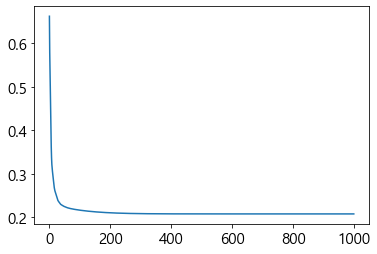

In [197]:
x = tf.constant(x_train, tf.float32)
y = tf.constant(y_train, tf.float32)
#xavier, he ==> ( 최적의 초기화 알고리즘 )
initX = tf.initializers.GlorotUniform()
w = tf.Variable( initX(shape=[ x_train.shape[1], y_train.shape[1]] ) )    
b = tf.Variable( initX(shape=[ y_train.shape[1]] ) )

def compute_loss():
    z = tf.matmul(x,w) +b
    cost_i = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=z)
    cost = tf.reduce_mean(cost_i)
    return cost   
    
optimizer = Adam( 0.1 )
hist_cost = []

for i in range(1000):
    optimizer.minimize( compute_loss, var_list=[w,b] )
    c = compute_loss().numpy()
    hist_cost.append(c)
    print(i, 'cost:', c)

plt.plot(hist_cost)
plt.show()

In [198]:
def hxfn(x_data):
    xd = tf.constant(x_data, tf.float32)
    z = tf.matmul(xd, w) + b
    hx = tf.nn.sigmoid(z)
    return (hx.numpy() > 0.5 ) + 0

## 정규화 O Tensorflow Train set / confusion matrix, R2, Acc, F1 score

<AxesSubplot:>

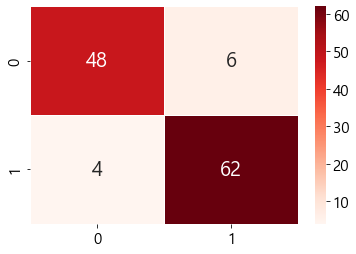

In [199]:
pred = hxfn(x_train)
r = y_train.values
sns.heatmap(confusion_matrix(r, pred),
            annot=True,
            annot_kws={'size': 20},
            cmap='Reds',
            fmt = 'd',
            linewidths=0.5
           )

In [200]:
print('R2 스코어:', r2_score(r, pred))
print('정확도:', accuracy_score(r, pred))
f1 = f1_score(r, pred)
print(f'F1 스코어: {f1:.4f}')

R2 스코어: 0.6632996632996634
정확도: 0.9166666666666666
F1 스코어: 0.9254


## 정규화 O Tensorflow Test set / confusion matrix, R2, Acc, F1 score

<AxesSubplot:>

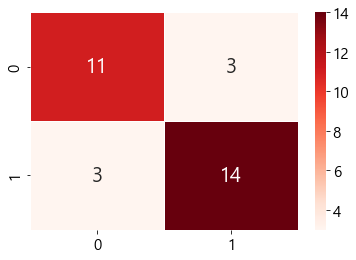

In [201]:
pred = hxfn(x_test)
r = y_test.values
sns.heatmap(confusion_matrix(r, pred),
            annot=True,
            annot_kws={'size': 20},
            cmap='Reds',
            fmt = 'd',
            linewidths=0.5
           )

In [202]:
print('R2 스코어:', r2_score(r, pred))
print('정확도:', accuracy_score(r, pred))
f1 = f1_score(r, pred)
print(f'F1 스코어: {f1:.4f}')

R2 스코어: 0.21848739495798297
정확도: 0.8064516129032258
F1 스코어: 0.8235


## 정규화 O , Keras

Epoch 1/1000
4/4 [==============================] - 0s 993us/step - loss: 0.5299 - acc: 0.7250
Epoch 2/1000
4/4 [==============================] - 0s 665us/step - loss: 0.3630 - acc: 0.8500
Epoch 3/1000
4/4 [==============================] - 0s 665us/step - loss: 0.2969 - acc: 0.8500
Epoch 4/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2709 - acc: 0.8583
Epoch 5/1000
4/4 [==============================] - 0s 665us/step - loss: 0.2560 - acc: 0.8667
Epoch 6/1000
4/4 [==============================] - 0s 997us/step - loss: 0.2433 - acc: 0.8667
Epoch 7/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2361 - acc: 0.8917
Epoch 8/1000
4/4 [==============================] - 0s 333us/step - loss: 0.2320 - acc: 0.8833
Epoch 9/1000
4/4 [==============================] - 0s 665us/step - loss: 0.2280 - acc: 0.9000
Epoch 10/1000
4/4 [==============================] - 0s 665us/step - loss: 0.2270 - acc: 0.9000
Epoch 11/1000
4/4 [==============================] - 

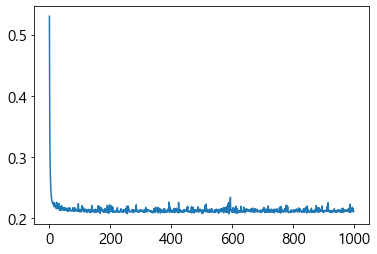

In [203]:
dense = Dense(units=1, input_dim=x_train.shape[1], activation="sigmoid")    
model = Sequential( [dense] )
model.compile( loss="binary_crossentropy", optimizer=Adam(0.1), metrics=['acc'] )
h = model.fit(x_train, y_train, epochs=1000)

plt.plot(h.history['loss'])
plt.show()

## 정규화 O Keras Train set / confusion matrix, R2, Acc, F1 score

<AxesSubplot:>

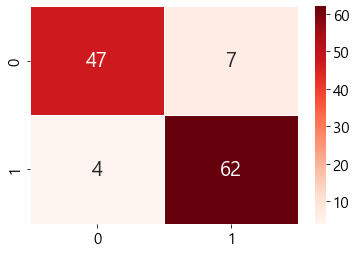

In [204]:
pred = (model.predict(x_train) > 0.5) +0
sns.heatmap(confusion_matrix( y_train, pred),
            annot=True,
            annot_kws={'size': 20},
            cmap='Reds',
            fmt = 'd',
            linewidths=0.5
           )

In [205]:
print('R2 스코어:', r2_score(y_train, pred))
print('정확도:', accuracy_score(y_train, pred))
f1 = f1_score(y_train, pred)
print(f'F1 스코어: {f1:.4f}')

R2 스코어: 0.6296296296296298
정확도: 0.9083333333333333
F1 스코어: 0.9185


## 정규화 O Keras Test set / confusion matrix, R2, Acc, F1 score

<AxesSubplot:>

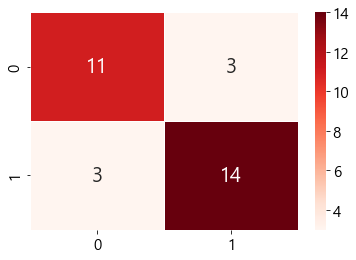

In [206]:
pred = (model.predict(x_test) > 0.5) +0
sns.heatmap(confusion_matrix( y_test, pred),
            annot=True,
            annot_kws={'size': 20},
            cmap='Reds',
            fmt = 'd',
            linewidths=0.5
           )

In [207]:
print('R2 스코어:', r2_score(y_test, pred))
print('정확도:', accuracy_score(y_test, pred))
f1 = f1_score(y_test, pred)
print(f'F1 스코어: {f1:.4f}')

R2 스코어: 0.21848739495798297
정확도: 0.8064516129032258
F1 스코어: 0.8235
